In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplot as lib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [5]:
import cv2
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
gen_sign= [glob.glob('Dataset_Signature_Final/Dataset/dataset1/real/*.*'), 
           glob.glob('Dataset_Signature_Final/Dataset/dataset2/real/*.*'), 
           glob.glob('Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
           glob.glob('Dataset_Signature_Final/Dataset/dataset4/real/*.*')]

forg_sign=[glob.glob('Dataset_Signature_Final/Dataset/dataset1/forge/*.*'), 
           glob.glob('Dataset_Signature_Final/Dataset/dataset2/forge/*.*'), 
           glob.glob('Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
           glob.glob('Dataset_Signature_Final/Dataset/dataset4/forge/*.*')]


In [7]:
def load_images (file_list):
     images = []
     for files in file_list:
        for file in files: 
            img = cv2.imread(file)
            images.append(img)
            return images

In [8]:
gen_imgs=load_images(gen_sign)
forg_imgs=load_images(forg_sign)

In [9]:
print(gen_imgs[0])

[[[252 252 244]
  [252 252 244]
  [252 252 244]
  ...
  [253 251 239]
  [253 251 241]
  [253 252 242]]

 [[252 252 244]
  [252 252 244]
  [252 252 244]
  ...
  [253 252 241]
  [253 251 240]
  [253 252 242]]

 [[252 252 243]
  [252 252 243]
  [252 252 244]
  ...
  [253 251 240]
  [253 251 239]
  [253 251 240]]

 ...

 [[252 252 243]
  [253 252 242]
  [253 252 241]
  ...
  [253 252 242]
  [253 252 242]
  [253 252 242]]

 [[252 252 243]
  [252 252 243]
  [253 252 242]
  ...
  [253 252 241]
  [252 252 242]
  [252 252 243]]

 [[253 252 242]
  [252 252 242]
  [253 252 243]
  ...
  [253 251 240]
  [253 251 239]
  [253 252 241]]]


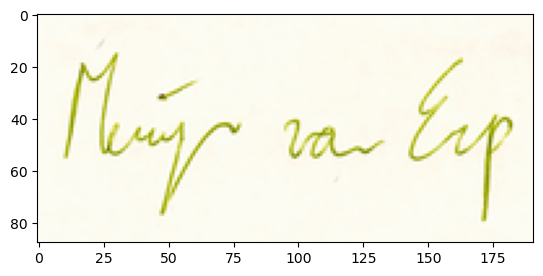

In [10]:
plt.imshow(gen_imgs[0])
plt.show()

In [11]:
gen_imgs[0].shape

(88, 191, 3)

In [ ]:
cv2.imshow('Genuin Signature',gen_imgs[0])
cv2.waitKey(0)
cv2.destroyAllwindows()

In [13]:
num_gen= sum([len(x) for x in gen_sign])
num_forg=sum([len(x) for x in forg_sign])
print(f'Number of real signatures: {num_gen}')
print(f'Number of forged signatures: {num_forg}')

Number of real signatures: 360
Number of forged signatures: 360


In [14]:
gen_shape=[x.shape for x in gen_imgs]
forg_shape=[x.shape for x in forg_imgs]
print('shape of real images:', gen_shape[:5])
print('Shape of forged images:',forg_shape[:5])

gen_color=[x.shape[2] for x in gen_imgs]
forg_color=[x.shape[2] for x in forg_imgs]
print('Color channels of real images:', gen_color[:5])
print('Color channels of forged images:',forg_color[:5])

gen_pixels=[x.mean() for x in gen_imgs]
forg_pixels=[x.mean() for x in forg_imgs]
print('Mean pixels values of real images:',gen_pixels[:5])
print('Mean pixels values of forged images: ', forg_pixels[:5])

shape of real images: [(88, 191, 3)]
Shape of forged images: [(83, 226, 3)]
Color channels of real images: [3]
Color channels of forged images: [3]
Mean pixels values of real images: [242.76453672854197]
Mean pixels values of forged images:  [242.45354870810675]


IndexError: list index out of range

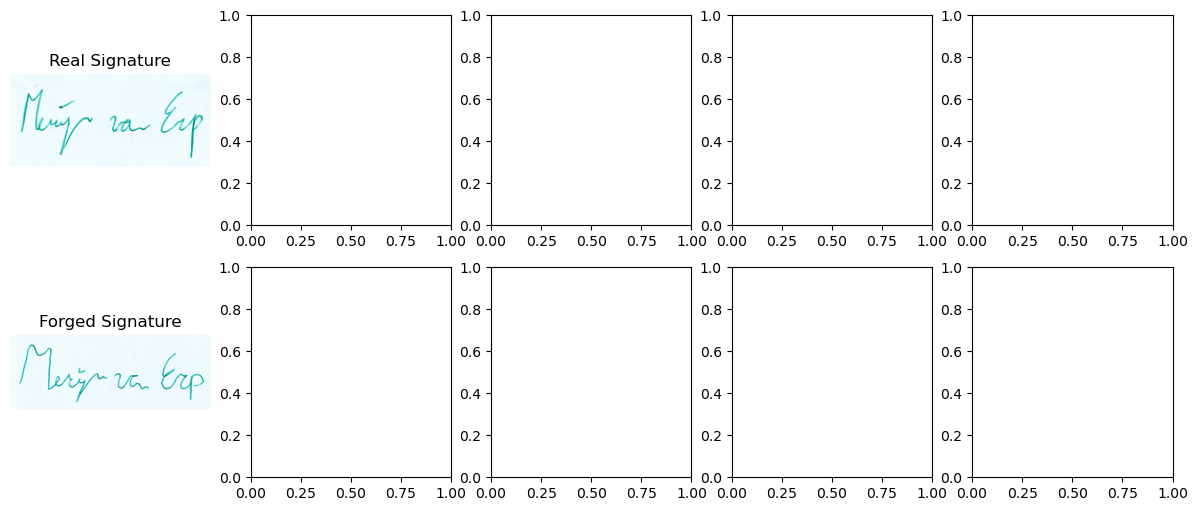

In [15]:
fig,ax=plt.subplots (2,5, figsize =(15,6))

for i in range(5):
    ax[0,i].imshow(cv2.cvtColor(gen_imgs[i],cv2.COLOR_BGR2RGB))
    ax[0,i].set_title('Real Signature')
    ax[0,i].axis('off')
    ax[1,i].imshow(cv2.cvtColor(forg_imgs[i],cv2.COLOR_BGR2RGB))
    ax[1,i].set_title('Forged Signature')
    ax[1,i].axis('off')
plt.show()

In [16]:
image_data=pd.DataFrame(columns=['Type','Shape','Color Channels','Mean Pixel Value'])

In [17]:
data_list = []

for i in range(len(gen_shape)):
    data_list.append({'Type': 'Real',
                       'Shape': gen_shape[i],
                       'Color Channels': gen_color[i],
                       'Mean Pixel Value': gen_pixels[i]})

In [18]:
for i in range(len(forg_shape)):
    data_list.append({'Type': 'Forged',
                       'Shape': forg_shape[i],
                       'Color Channels': forg_color[i],
                       'Mean Pixel Value': forg_pixels[i]})

In [19]:
image_data = pd.concat([image_data, pd.DataFrame(data_list)],ignore_index=True)

C:\Users\Hanumanji\AppData\Local\Temp\ipykernel_4440\104427563.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  image_data = pd.concat([image_data, pd.DataFrame(data_list)],ignore_index=True)


In [20]:
image_data.head()

,Type,Shape,Color Channels,Mean Pixel Value
0,Real,"(88, 191, 3)",3,242.764537
1,Forged,"(83, 226, 3)",3,242.453549


In [21]:
image_data.tail()

,Type,Shape,Color Channels,Mean Pixel Value
0,Real,"(88, 191, 3)",3,242.764537
1,Forged,"(83, 226, 3)",3,242.453549


In [22]:
fig,ax=plt.subplots(2,2,fig_size-(10,6))
image_data[image_data['Type']=='Real']['Color Channels'].hist(ax=ax[0,0])
image_data[image_data['Type']=='Forged']['Color Channels'].hist(ax=ax[1,0])
image_data[image_data['Type']=='Real']['Mean Pixel Value'].hist(ax=ax[0,1])
image_data[image_data['Type']=='Forged']['Mean Pixel Value'].hist(ax=ax[1,1])

ax[0,0].set_title('Color Channels of Real Signatures')
ax[0,1].set_title('Mean Pixel Value of Real Signatures')
ax[1,0].set_title('Color Channels of Forged Signatures')
ax[1,1].set_title('Mean Pixel Value of Forged Signatures')

plt.tight_layout()
Plt.show()

NameError: name 'fig_size' is not defined

In [23]:
import tensorflow
from tensorflow import keras
from keras import layers
(train_data, train_labels),(test_data,test_labels) = keras.datasets.mnist.load_data()
train_data = train_data.reshape((train_data.shape[0], train_data.shape[1],train_data.shape[2]* 1))
test_data = test_data.reshape((test_data.shape[0],test_data.shape[1],test_data.shape[2]*1))
train_data = train_data.astype('float32')/255
test_data = test_data.astype('float32') / 255

ModuleNotFoundError: No module named 'tensorflow'

In [24]:
model = keras.Sequential([layers.LSTM(64,input_shape=(train_data.shape[1], train_data.shape[2])),
                          layers.Dense(10, activation='softmax')])



NameError: name 'keras' is not defined

In [25]:
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.summary()

NameError: name 'model' is not defined

In [26]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)
history = model.fit(train_data, train_labels, batch_size=128,

                    epochs=10, validation_split=0.2,callbacks=[early_stop])


 

NameError: name 'keras' is not defined

In [27]:
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


NameError: name 'history' is not defined